In [1]:
import sys, os
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

home_dir = '/home/mtr22/dvorak/net/pulsar/home/koes/mtr22'
ligan_dir = home_dir + '/gan'
work_dir = home_dir + '/gan/test_atom_fitting/1ajv'

sys.path.append(ligan_dir)
from params import ParamSpace
from results import add_group_column, plot_strips, plot_corr

In [2]:
fit_name = '{atom_init}_{beam_size}_{interm_iters}_{final_iters}'
fit_params = ParamSpace(format=fit_name.format)
fit_params['atom_init'] = ['n', 'c', 'd']
fit_params['beam_size'] = [1, 3, 5]
fit_params['interm_iters'] = [0, 1, 10]
fit_params['final_iters'] = [0, 1, 10]
len(fit_params)

81

In [3]:
dfs = []
for fit_param in fit_params:
    fit_name = fit_param.name
    metrics_file = '{}/{}.gen_metrics'.format(work_dir, fit_name)
    try:
        df = pd.read_csv(metrics_file, sep=' ')
        df['fit_name'] = fit_name
        for p, v in fit_param.items():
            df[p] = v
        dfs.append(df)
    except FileNotFoundError:
        print('FileNotFound: {}'.format(metrics_file), file=sys.stderr)
    
df = pd.concat(dfs)

# remove columns
for c in df:
    if '_gen' in c:
        del df[c]
        
# add columns
df['n_atoms_diff'] = df['lig_fit_n_atoms'] - 41

def aggregate(x):
    if x.name == 'sample_idx':
        return x.nunique()
    elif is_numeric_dtype(x):
        return x.mean()
    else:
        return x.iloc[0]

agg_df = df.groupby('fit_name').agg(aggregate)
agg_df = agg_df.rename(columns={'sample_idx': 'n_samples'})

print(df.columns)

FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/n_5_10_1.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/n_5_10_10.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/c_1_0_0.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/c_1_0_1.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/c_1_0_10.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/c_1_1_0.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/c_1_1_1.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/c_1_1_10.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/c_1_10_0.gen_metrics
FileNotFound: /home/mtr22/dvora

Index(['lig_name', 'sample_idx', 'lig_norm', 'lig_var', 'lig_fit_loss',
       'lig_fit_n_atoms', 'lig_fit_radius', 'lig_fit_time', 'fit_name',
       'atom_init', 'beam_size', 'interm_iters', 'final_iters',
       'n_atoms_diff'],
      dtype='object')


FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/d_5_10_0.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/d_5_10_1.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/1ajv/d_5_10_10.gen_metrics


In [4]:
agg_df.sort_values(['lig_fit_time'])

,lig_name,n_samples,lig_norm,lig_var,lig_fit_loss,lig_fit_n_atoms,lig_fit_radius,lig_fit_time,atom_init,beam_size,interm_iters,final_iters,n_atoms_diff
fit_name,,,,,,,,,,,,,
n_1_0_0,1ajv_min,10,54.542777,1972.53408,57.020573,40.7,8.029417,236.053846,n,1,0,0,-0.3
n_1_0_1,1ajv_min,10,54.542757,2028.11349,27.178039,40.9,7.950192,255.913764,n,1,0,1,-0.1
n_1_0_10,1ajv_min,10,54.542748,1983.83031,11.963798,40.9,7.922457,426.343476,n,1,0,10,-0.1
n_1_1_0,1ajv_min,10,54.542756,1962.13497,8.136552,41.0,7.924166,677.990918,n,1,1,0,0.0
n_1_1_1,1ajv_min,10,54.542696,2042.57864,5.585151,40.9,7.861922,693.326574,n,1,1,1,-0.1
n_1_1_10,1ajv_min,10,54.542713,1903.46005,1.684349,40.8,7.898925,860.663860,n,1,1,10,-0.2
n_1_10_0,1ajv_min,10,54.542479,1953.70986,0.121896,41.0,7.889890,1961.555282,n,1,10,0,0.0
n_3_0_1,1ajv_min,10,54.542634,1964.85046,29.445668,41.0,8.029312,2014.046880,n,3,0,1,0.0
n_3_0_0,1ajv_min,10,54.542578,2015.43689,62.222261,41.3,8.214178,2019.063076,n,3,0,0,0.3


In [5]:
sns.set_context('notebook')
sns.set_style('white')

x = ['atom_init', 'beam_size', 'interm_iters', 'final_iters']
y = ['lig_fit_loss', 'n_atoms_diff', 'lig_fit_time']
    
for col in x:
    add_group_column(df, [c for c in x if c != col])
    
df['atom_init_idx'] = df['atom_init'].apply(lambda x: 'ncd'.index(x))
df.sort_values(['atom_init_idx', 'beam_size', 'interm_iters', 'final_iters'], inplace=True)

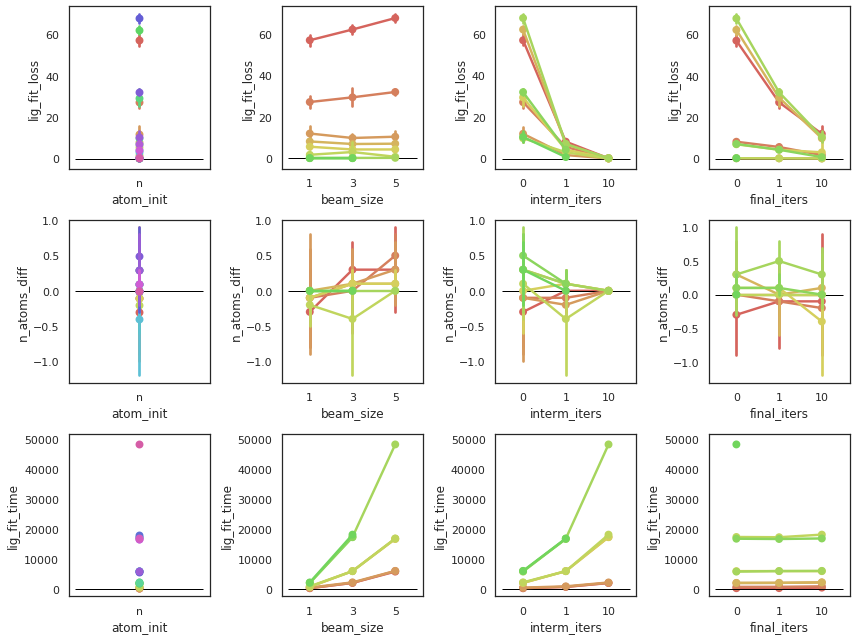

In [6]:
%matplotlib inline
sns.set_palette('hls', n_colors=27, desat=0.9)

plot_strips('1ajv_strips_grouped.png', df, x, y, height=3, width=3, hue=None, grouped=True,
            point=True,  point_kws=dict(alpha=0.0,  dodge=False, scale=0.9),
            strip=False, strip_kws=dict(alpha=0.25, dodge=False, jitter=True, marker='.', size=10))
plt.show()

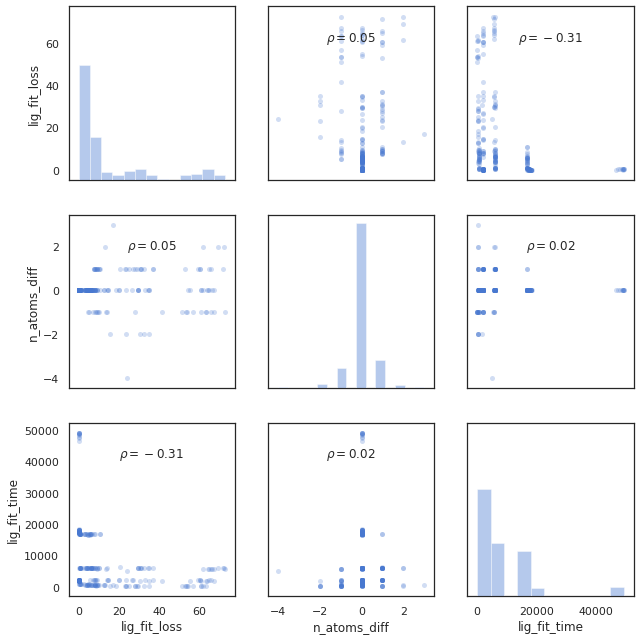

In [7]:
sns.set_palette('muted')

plot_corr('1ajv_corr.png', df, y, y, height=3, width=3,
          scatter_kws=dict(alpha=0.25, s=25, linewidth=0),
          dist_kws=dict(kde=False), despine=False)
plt.show()